Import libraries

In [1]:
import numpy as np
import os
import glob
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Define dataset paths

In [2]:
train_dir = './chest_Xray/train'
val_dir =  './chest_Xray/val'
test_dir = './chest_Xray/test'

Define image size

In [3]:
image_size = (150, 150)

Load and preprocess images

In [4]:
# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for folder_name in os.listdir(directory):
        label = folder_name.lower()
        folder_path = os.path.join(directory, folder_name)
        for img_path in glob.glob(os.path.join(folder_path, '*.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            images.append(img.flatten())
            labels.append(label)
    return np.array(images), np.array(labels)

# Load train, validation, and test images
X_train, y_train = load_images(train_dir)
X_val, y_val = load_images(val_dir)
X_test, y_test = load_images(test_dir)

Label encoding

In [5]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

Define random forest model

In [6]:
rf_model = RandomForestClassifier()

Train model

In [7]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Evaluate the model on the test set

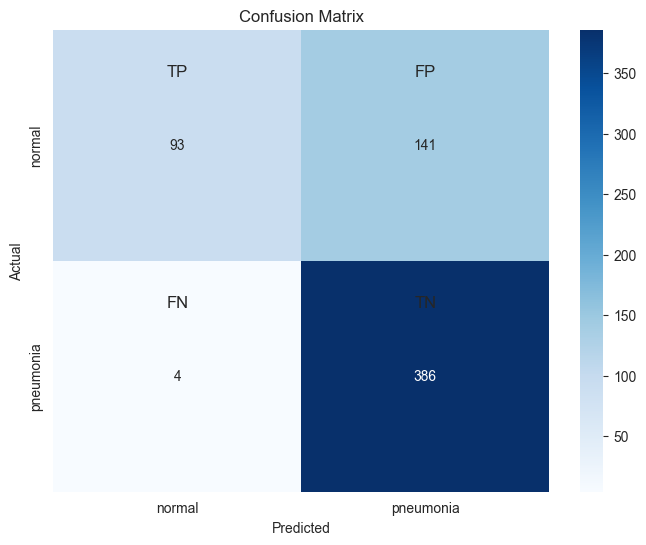

Accuracy: 0.7676
Precision: 0.7324
Recall: 0.9897
ROC-AUC: 0.6936


In [17]:
test_predictions = rf_model.predict(X_test)

cm = confusion_matrix(y_test, test_predictions)
tn, fp, fn, tp = cm.ravel()

class_names = label_encoder.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add TP, FP, FN, TN labels
plt.text(0.5, 0.2, 'TP', fontsize=12, ha='center')
plt.text(1.5, 0.2, 'FP', fontsize=12, ha='center')
plt.text(0.5, 1.2, 'FN', fontsize=12, ha='center')
plt.text(1.5, 1.2, 'TN', fontsize=12, ha='center')

plt.show()

accuracy_score = accuracy_score(y_test, test_predictions)
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
roc_auc_score = roc_auc_score(y_test, test_predictions)

print(f"Accuracy: {accuracy_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"ROC-AUC: {roc_auc_score:.4f}")

Predict a single image

In [27]:
image_path = './chest_Xray/test/PNEUMONIA/person1_virus_6.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, image_size)
img_flat = img.reshape(1, -1)

prediction = rf_model.predict(img_flat)

if prediction[0] == 0:
    predicted_label = 'NORMAL'
else:
    predicted_label = 'PNEUMONIA'

print("Predicted Label:", predicted_label)

Predicted Label: PNEUMONIA
